In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
data=pd.read_csv('/content/sample_data/onlinefraud.csv')

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [5]:
# check balanced or not
data['isFraud'].value_counts()

isFraud
0.0    42176
1.0       94
Name: count, dtype: int64

In [6]:
data.shape

(42271, 11)

In [9]:
# chech null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.5+ MB


In [11]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,42271.000000,4.227100e+04,4.227100e+04,4.227100e+04,4.227000e+04,4.227000e+04,42270.000000,42270.0
mean,7.171087,1.490108e+05,7.727734e+05,7.874065e+05,8.450982e+05,1.158405e+06,0.002224,0.0
std,2.118037,3.145005e+05,2.284003e+06,2.321941e+06,2.466743e+06,2.960508e+06,0.047105,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.000000,7.031875e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,2.751283e+04,1.856733e+04,3.339900e+02,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.794321e+05,1.421965e+05,1.500335e+05,4.337969e+05,8.013660e+05,0.000000,0.0
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,2.958454e+07,3.130692e+07,1.000000,0.0


In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [21]:
#check the values in columns
for col1 in data.columns:
    print(data[col1].value_counts())
    print('*****************************************')

step
8    21097
9     7172
7     6837
1     2708
6     1660
2     1014
5      665
4      565
3      552
Name: count, dtype: int64
*****************************************
type
PAYMENT     19382
CASH_OUT    10688
CASH_IN      7632
TRANSFER     3974
DEBIT         594
Name: count, dtype: int64
*****************************************
amount
25975.86     3
29707.86     3
6285.19      3
89631.24     3
17320.91     3
            ..
154708.41    1
39261.58     1
28747.19     1
319617.28    1
101025.44    1
Name: count, Length: 42089, dtype: int64
*****************************************
nameOrig
C1231006815    1
C427978936     1
C616186877     1
C1061681008    1
C894060432     1
              ..
C1528717993    1
C1061133744    1
C619429631     1
C214473697     1
C292739335     1
Name: count, Length: 42270, dtype: int64
*****************************************
oldbalanceOrg
0.00         12643
181.00          12
164.00          12
198.00          11
126.00          11
             ...  
716

In [22]:
#Check the no of unique values
for col1 in data.columns:
    print(col1)
    print(data[col1].nunique())
    print('#################')

step
9
#################
type
5
#################
amount
42089
#################
nameOrig
42270
#################
oldbalanceOrg
26583
#################
newbalanceOrig
21221
#################
nameDest
24625
#################
oldbalanceDest
20758
#################
newbalanceDest
6940
#################
isFraud
2
#################
isFlaggedFraud
1
#################


## Exploratory Data Analysis (EDA)


Exploratory Data Analysis or EDA is used to take insights from the data. Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques. Following things are part of EDA :

Get maximum insights from a data set Uncover underlying structure Extract important variables from the dataset Detect outliers and anomalies(if any) Test underlying assumptions Determine the optimal factor settings

In [23]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


step                 Axes(0.125,0.653529;0.168478x0.226471)
amount            Axes(0.327174,0.653529;0.168478x0.226471)
oldbalanceOrg     Axes(0.529348,0.653529;0.168478x0.226471)
newbalanceOrig    Axes(0.731522,0.653529;0.168478x0.226471)
oldbalanceDest       Axes(0.125,0.381765;0.168478x0.226471)
newbalanceDest    Axes(0.327174,0.381765;0.168478x0.226471)
isFraud           Axes(0.529348,0.381765;0.168478x0.226471)
isFlaggedFraud    Axes(0.731522,0.381765;0.168478x0.226471)
dtype: object

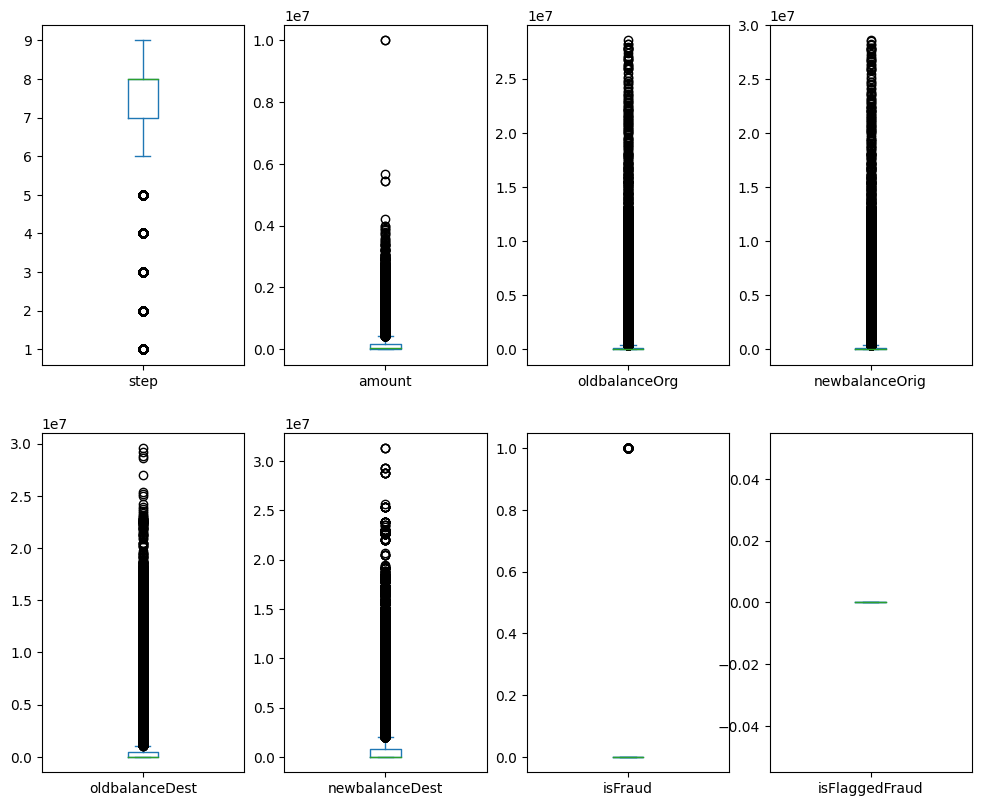

In [24]:
data.plot(kind='box',subplots=True,layout=(3,4),figsize=(12,15))

<Axes: >

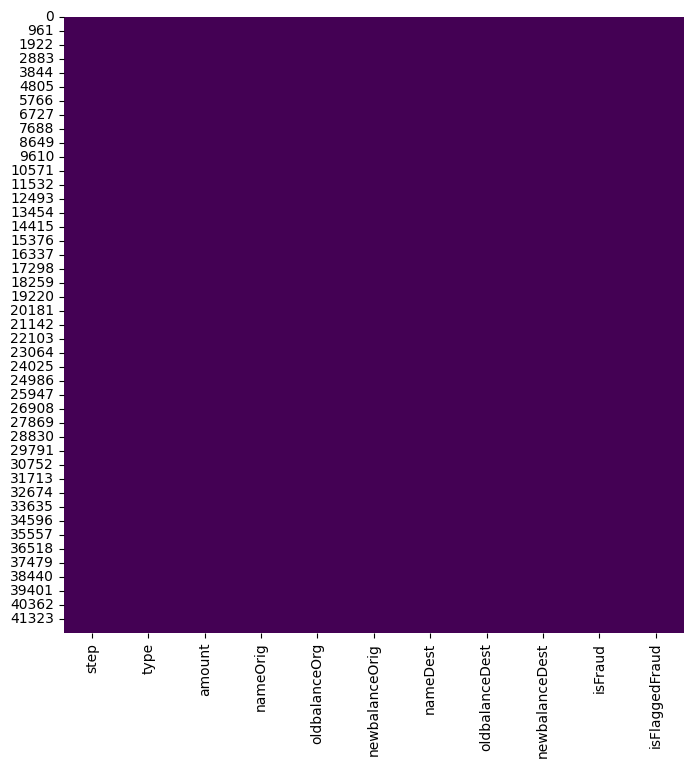

In [25]:
#check there is any null value in the columns using heatmap
fig=plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [26]:
data_num=data.select_dtypes(include='number')
data_num.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

step


<Figure size 640x480 with 0 Axes>

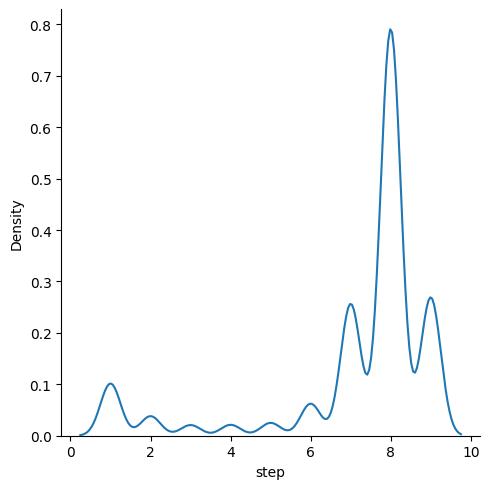

step
amount


<Figure size 640x480 with 0 Axes>

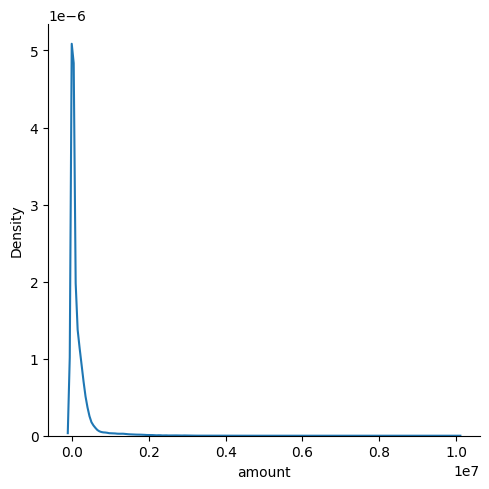

amount
oldbalanceOrg


<Figure size 640x480 with 0 Axes>

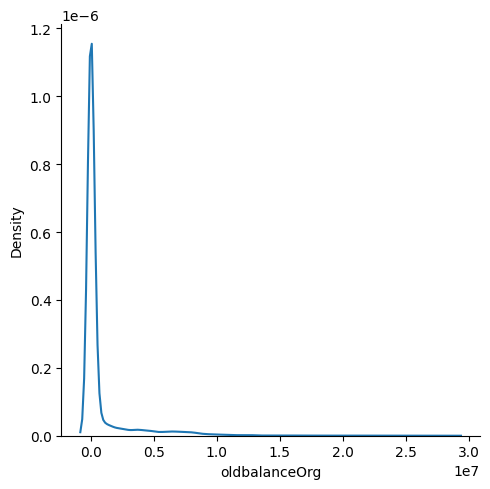

oldbalanceOrg
newbalanceOrig


<Figure size 640x480 with 0 Axes>

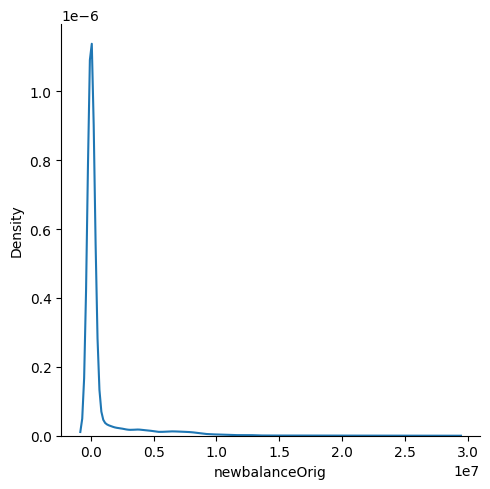

newbalanceOrig
oldbalanceDest


<Figure size 640x480 with 0 Axes>

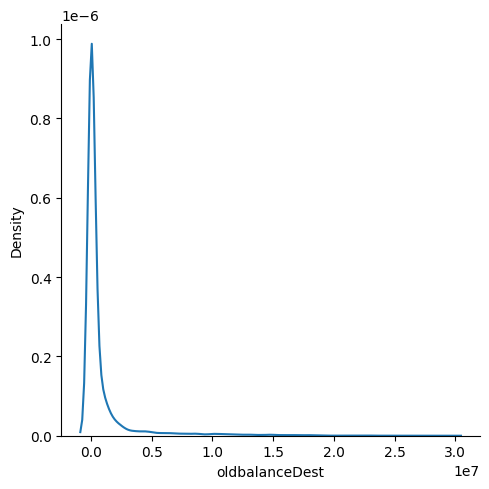

oldbalanceDest
newbalanceDest


<Figure size 640x480 with 0 Axes>

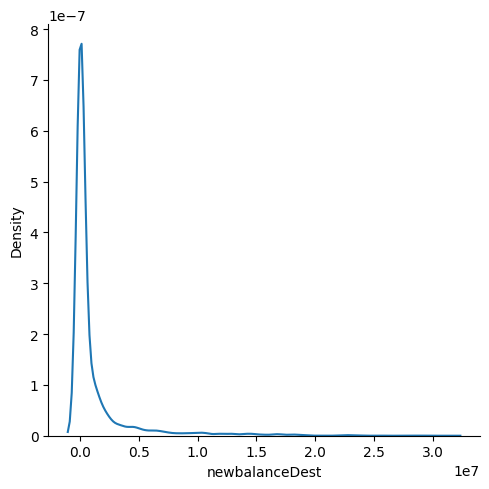

newbalanceDest
isFraud


<Figure size 640x480 with 0 Axes>

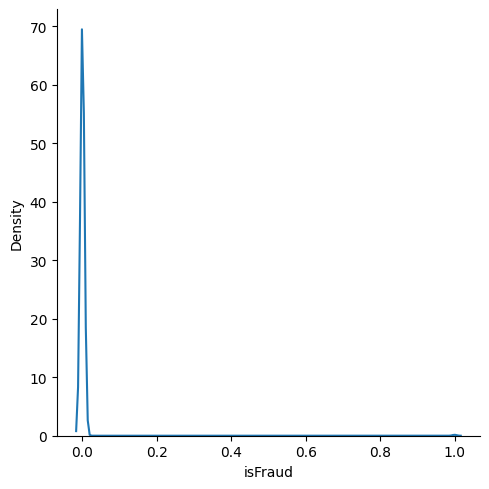

isFraud
isFlaggedFraud


<Figure size 640x480 with 0 Axes>

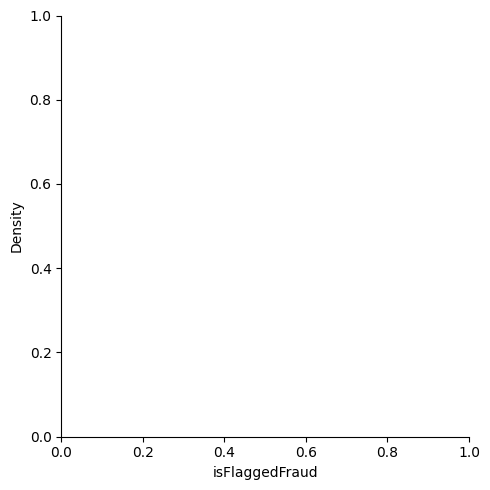

isFlaggedFraud


In [27]:
#check the density of data for each columns:
for i in data_num.columns:
    print(i)
    plt.figure()
    sns.displot(data_num[i],kind='kde')
    plt.show()
    print(i)

#The below graph indicates that the dataset is highly unbalanced.


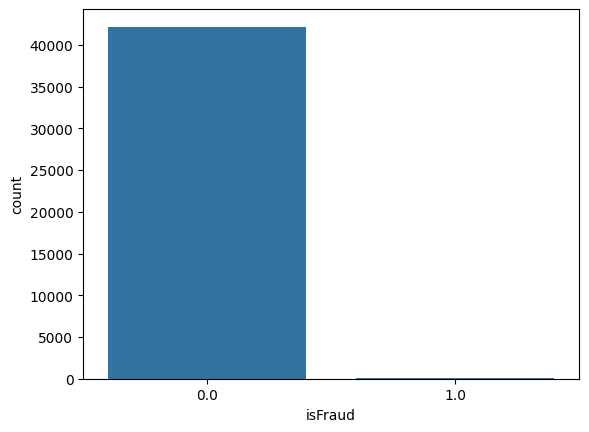

In [28]:
#check the data is balanced or not:
sns.countplot(x='isFraud',data=data)
print("#The below graph indicates that the dataset is highly unbalanced.")

 # Cash out and payment are the most common type of transactions.


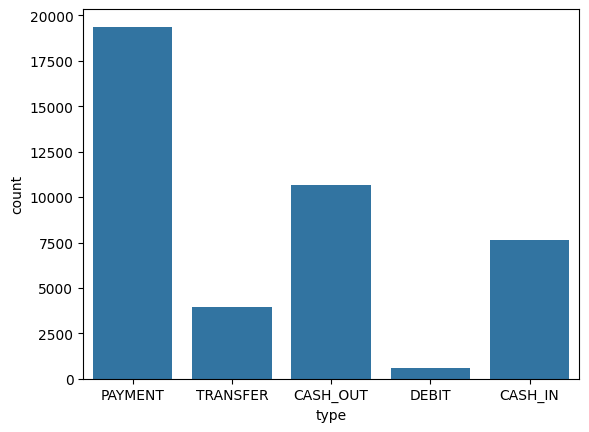

In [29]:
#Transaction type(methods)
sns.countplot(x='type',data=data)
print(" # Cash out and payment are the most common type of transactions.")

#'transfer' type has the maximum amount of money being transfered to the recipient.


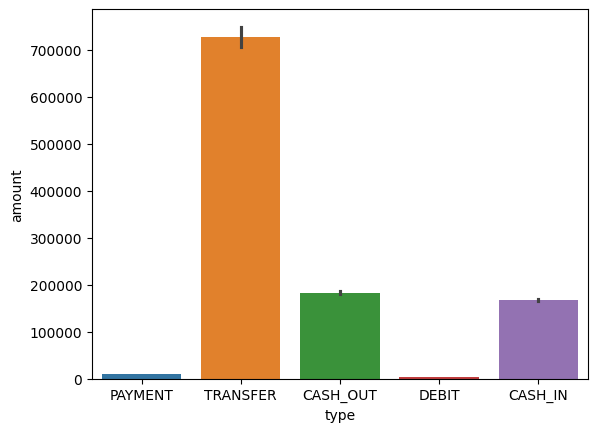

In [30]:
#"Transaction with Maximum Transfer Amount"
sns.barplot(x='type',y='amount',data=data,hue='type')
print("#'transfer' type has the maximum amount of money being transfered to the recipient.")

 # Cash out and payment are the most common type of transactions but Transfer type has the maximum amount of money being transfered to the recipient.


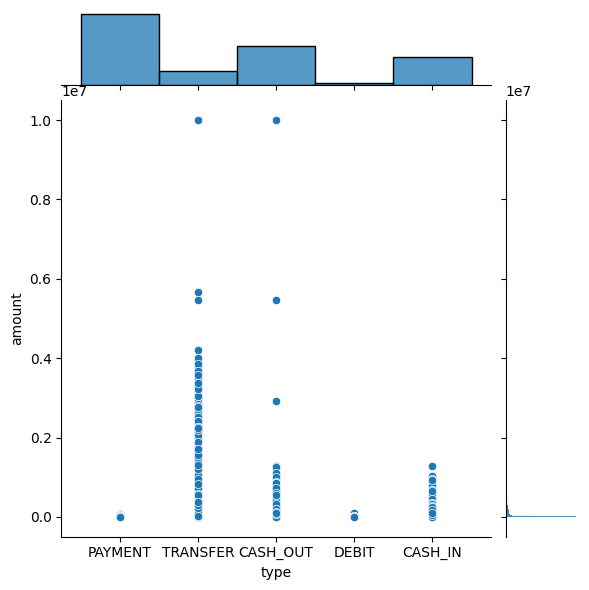

In [31]:
#"Comparison of Transaction Types by Total Amount Transferred"
sns.jointplot(x='type',y='amount',data=data)
print(" # Cash out and payment are the most common type of transactions but Transfer type has the maximum amount of money being transfered to the recipient.")

# graph present below indicate that transactions of the type 'transfer' and 'cash out' comprise fraudulent transactions.


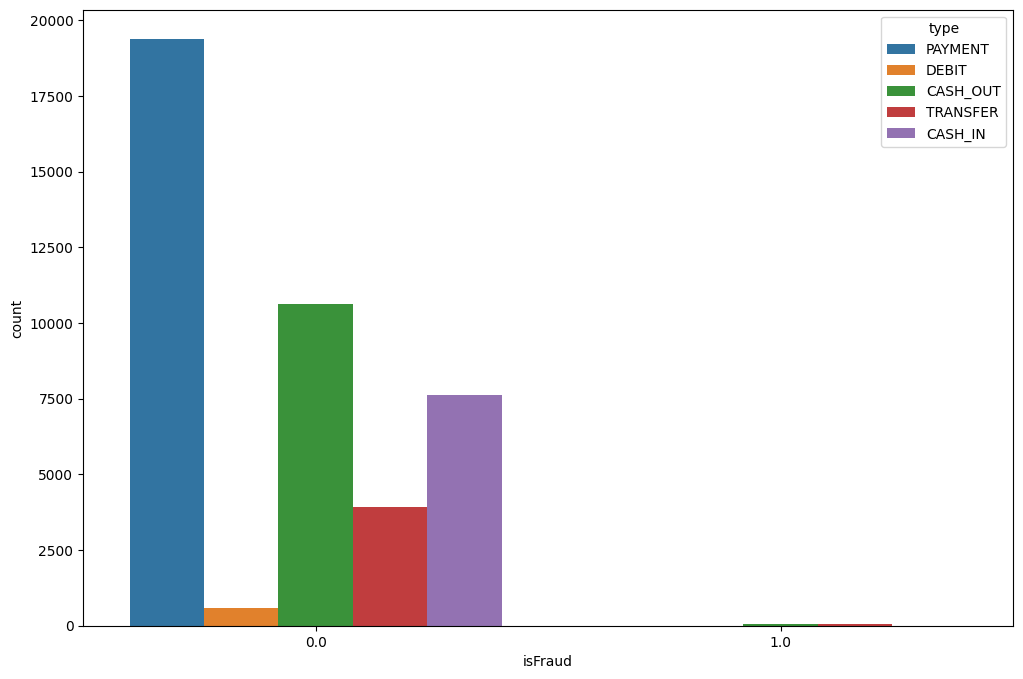

In [32]:
#Fraudulent Transactions by Transaction Type
plt.figure(figsize=(12,8))
sns.countplot(x='isFraud',data=data,hue='type')
print("# graph present below indicate that transactions of the type 'transfer' and 'cash out' comprise fraudulent transactions.")

<Axes: xlabel='type', ylabel='count'>

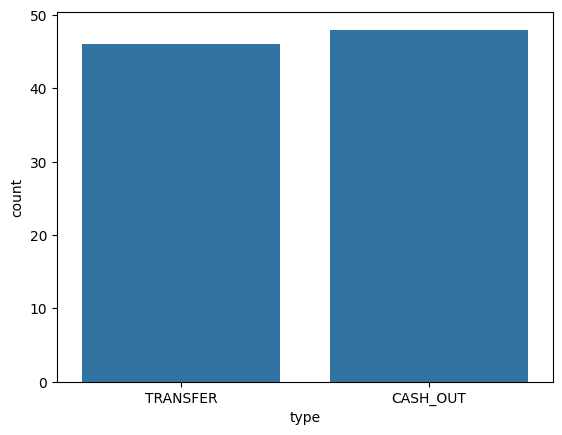

In [33]:
"Count of Fraudulent Transactions by Transaction Type"
sns.countplot(data[data['isFraud']==1], x='type')

In [34]:
# %Fraudulent Transactions by Transaction Type
transfer_fraud_percentage = len(data[(data['isFraud']==1)&(data['type']=='TRANSFER')]) / len(data[data['type']=='TRANSFER'])*100
cashout_fraud_percentage = len(data[(data['isFraud']==1)&(data['type']=='CASH_OUT')]) / len(data[data['type']=='CASH_OUT'])*100
print(f'% of fraud Transfer transactions: {transfer_fraud_percentage}')
print(f'% of fraud Cash Out transactions: {cashout_fraud_percentage}')

% of fraud Transfer transactions: 1.1575239053850024
% of fraud Cash Out transactions: 0.4491017964071856


<Axes: xlabel='step', ylabel='Density'>

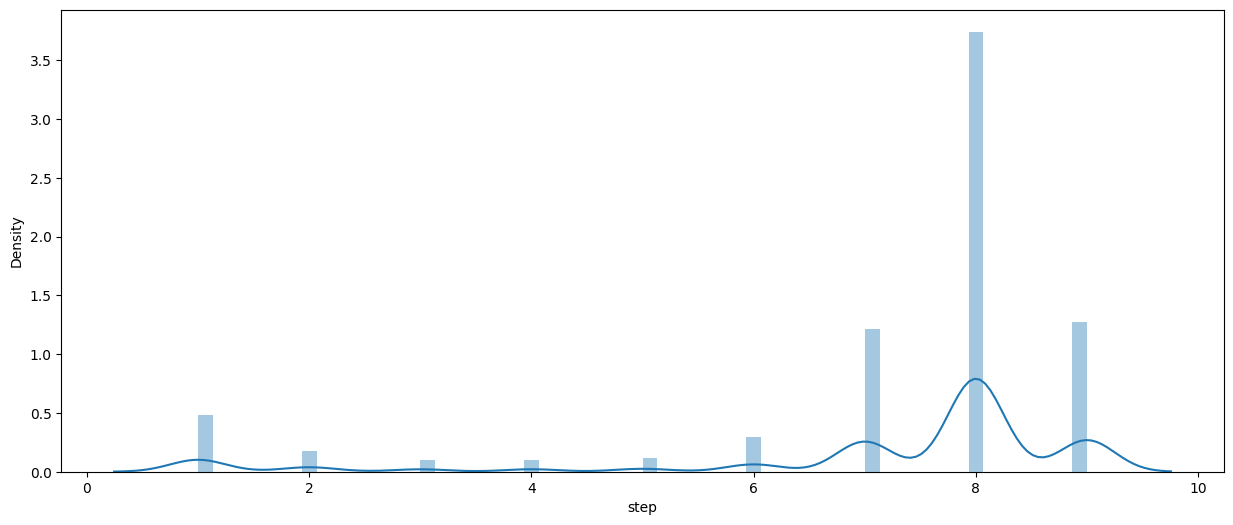

In [35]:
# Distribution of Steps in Dataset:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'],bins=60 )

# Hour by Fraud


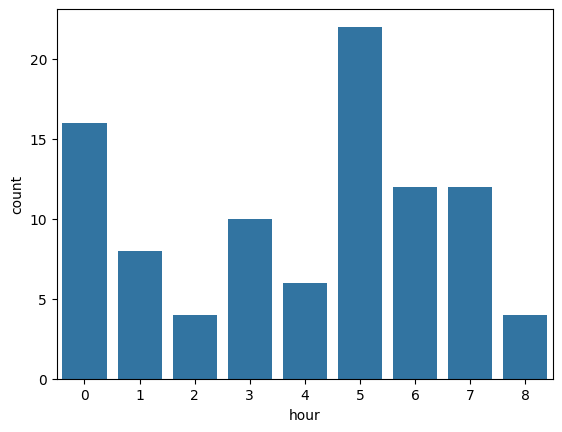

In [36]:
# Count of Fraudulent Transactions by Hour of the Day:
data['hour'] = (data['step'] - 1) % 24
sns.countplot(data[data['isFraud']==1], x="hour")
print("# Hour by Fraud")

# Hour by Amount Transfer


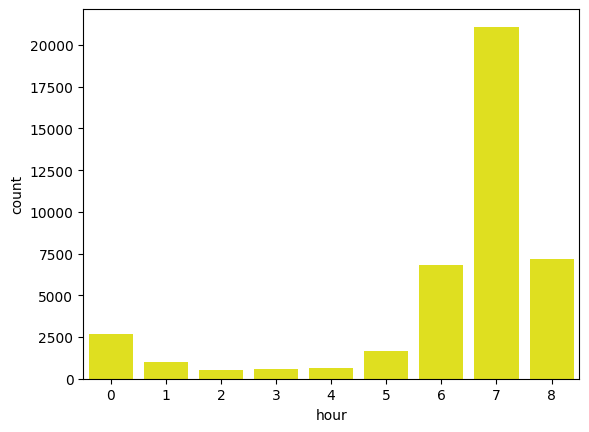

In [37]:
# Count of Amount of Transactions by Hour of the Day:
data['hour'] = (data['step'] - 1) % 24
sns.countplot(data,color='yellow', x="hour")
print("# Hour by Amount Transfer")

# fraud percentage by hour
hour
0    0.590842
1    0.788955
2    0.724638
3    1.769912
4    0.902256
5    1.325301
6    0.175516
7    0.056880
8    0.055772
Name: count, dtype: float64


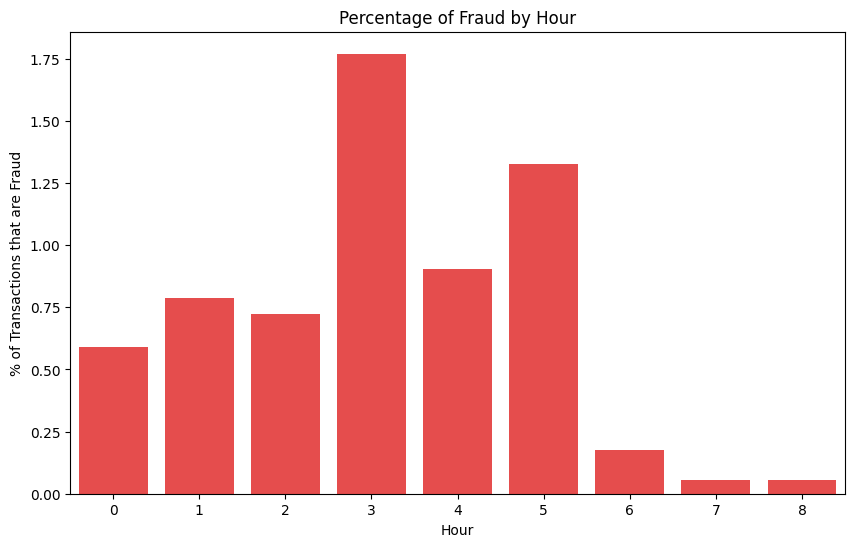

In [38]:
# Count of Percentage of Fraud by Hour:
fraud_percentage_by_hour = (data[data['isFraud'] == 1]['hour'].value_counts() / data['hour'].value_counts()) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_percentage_by_hour.index, y=fraud_percentage_by_hour.values, color='red', alpha=0.8)
plt.xlabel('Hour')
plt.ylabel('% of Transactions that are Fraud')
plt.title('Percentage of Fraud by Hour')
print("# fraud percentage by hour")
print(fraud_percentage_by_hour)

In [39]:
type = data['type'].value_counts()
transactions = type.index
quantity = type.values
quantity

array([19382, 10688,  7632,  3974,   594])

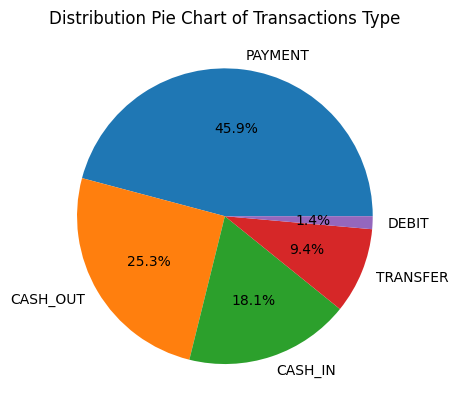

In [40]:
#Distribution Transactions Type:
type = data['type'].value_counts()
transactions = type.index
quantity = type.values
quantity
plt.pie(quantity, labels=transactions, autopct="%1.1f%%")
plt.title('Distribution Pie Chart of Transactions Type')
plt.show()

In [41]:
#sns.pairplot(data)

<Axes: >

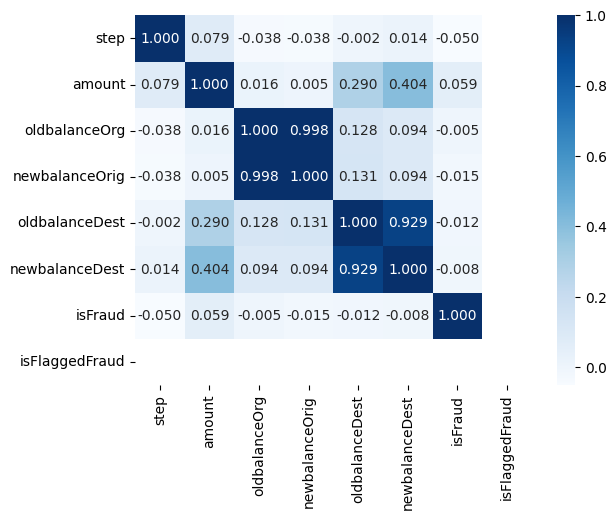

In [43]:
 #plot the heatmap
corr = data_num.corr() # plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")

## Feature Engineering

In [44]:
df=data.copy()

In [45]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
hour                int64
dtype: object

In [46]:
# spliting  the "nameOrig" column
df['nameorignew1']=df['nameOrig'].astype('str')
df['nameorignew1']=[df['nameorignew1'][i][0] for i in range(df.shape[0])]
df['nameorignew1'].unique()
df['nameorignew']=[df['nameOrig'][i][1:] for i in range(df.shape[0])]

In [47]:
df['nameorignew1'].unique()

array(['C'], dtype=object)

In [48]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,nameorignew1,nameorignew
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0,C,1231006815
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0,C,1666544295
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,0,C,1305486145
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,0,C,840083671
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0,C,2048537720


In [49]:
#spliting "nameDest" column
df['nameDestnew']=df['nameDest'].astype('str')
df['nameDestnew']=[df['nameDestnew'][i][0] for i in range(df.shape[0])]
df['nameDestnew'].unique()
df['nameDestnew1']=[df['nameDest'][i][1:] for i in range(df.shape[0])]

In [50]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,nameorignew1,nameorignew,nameDestnew,nameDestnew1
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0,C,1231006815,M,1979787155
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0,C,1666544295,M,2044282225
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,0,C,1305486145,C,553264065
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,0,C,840083671,C,38997010
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0,C,2048537720,M,1230701703


#Apply one hot encoding (to convert categorical values to numerical)

In [51]:
#Apply one hot encoding (to convert categorical values to numerical)
df=pd.get_dummies(df,columns=['type'],dtype='int')

In [52]:
df=pd.get_dummies(df,columns=['nameorignew1'],dtype='int')

In [53]:
df=pd.get_dummies(df,columns=['nameDestnew'],dtype='int')

In [54]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,...,nameorignew,nameDestnew1,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameorignew1_C,nameDestnew_C,nameDestnew_M
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,...,1231006815,1979787155,0,0,0,1,0,1,0,1
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,...,1666544295,2044282225,0,0,0,1,0,1,0,1
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,...,1305486145,553264065,0,0,0,0,1,1,1,0
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,...,840083671,38997010,0,1,0,0,0,1,1,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,...,2048537720,1230701703,0,0,0,1,0,1,0,1


#drop unused columns

In [55]:
df.drop(['type_CASH_IN'],axis=1,inplace=True)

In [56]:
df.drop(['nameOrig'],axis=1,inplace=True)

In [57]:
df.drop(['nameDest'],axis=1,inplace=True)

In [58]:
df.drop(['nameDestnew_M'],axis=1,inplace=True)

In [59]:
df.drop(['hour'],axis=1,inplace=True)

In [60]:
df.drop(['isFlaggedFraud'],axis=1,inplace=True)

In [61]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,nameorignew,nameDestnew1,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameorignew1_C,nameDestnew_C
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,1231006815,1979787155,0,0,1,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,1666544295,2044282225,0,0,1,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,1305486145,553264065,0,0,0,1,1,1
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,840083671,38997010,1,0,0,0,1,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,2048537720,1230701703,0,0,1,0,1,0


In [62]:
#data.drop(['step','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER','nameorignew1','nameDestnew_C'],axis=1,inplace=True)

In [63]:
#df.head()

## Model Building

In [64]:
#divide data into dependent and independent variable
x=df.drop('isFraud',axis=1)
y=df['isFraud']

In [65]:
x.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,nameorignew,nameDestnew1,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameorignew1_C,nameDestnew_C
0,1,9839.64,170136.0,160296.36,0.0,0.0,1231006815,1979787155,0,0,1,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,1666544295,2044282225,0,0,1,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1305486145,553264065,0,0,0,1,1,1
3,1,181.00,181.0,0.00,21182.0,0.0,840083671,38997010,1,0,0,0,1,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,2048537720,1230701703,0,0,1,0,1,0


In [66]:
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: isFraud, dtype: float64

In [67]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)

In [68]:
df_scaled=pd.DataFrame(x_scaled)

In [69]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-2.913592,-0.442507,-0.263860,-0.270089,-0.342601,-0.391290,0.249243,1.460550,-0.581739,-0.119385,1.086687,-0.322134,0.0,-1.086687
1,-2.913592,-0.467865,-0.329047,-0.330776,-0.342601,-0.391290,0.953119,1.565240,-0.581739,-0.119385,1.086687,-0.322134,0.0,-1.086687
2,-2.913592,-0.473218,-0.338271,-0.339124,-0.342601,-0.391290,0.369610,-0.855003,-0.581739,-0.119385,-0.920228,3.104294,0.0,0.920228
3,-2.913592,-0.473218,-0.338271,-0.339124,-0.334014,-0.391290,-0.382532,-1.689769,1.718983,-0.119385,-0.920228,-0.322134,0.0,0.920228
4,-2.913592,-0.436693,-0.320157,-0.326253,-0.342601,-0.391290,1.570463,0.244624,-0.581739,-0.119385,1.086687,-0.322134,0.0,-1.086687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42265,0.863522,-0.470578,-0.338211,-0.339124,-0.342601,-0.391290,-0.443800,0.051427,-0.581739,-0.119385,1.086687,-0.322134,0.0,-1.086687
42266,0.863522,0.147396,-0.338350,-0.339124,-0.137081,0.062617,0.031222,1.528389,1.718983,-0.119385,-0.920228,-0.322134,0.0,0.920228
42267,0.863522,1.262537,-0.338350,-0.339124,1.714984,1.507578,1.154310,-0.066286,1.718983,-0.119385,-0.920228,-0.322134,0.0,0.920228
42268,0.863522,-0.120840,-0.338350,-0.339124,0.684336,0.501866,0.111468,-0.546163,1.718983,-0.119385,-0.920228,-0.322134,0.0,0.920228


In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=101)

In [71]:
x_train.shape,y_train.shape

((33816, 14), (33816,))

In [72]:
y_train.value_counts()

isFraud
0.0    33740
1.0       76
Name: count, dtype: int64

## Oversampling

In [73]:
#Dataset is highly imbalenced
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE,RandomOverSampler,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss,TomekLinks

In [74]:
SM = SMOTE(sampling_strategy='minority',random_state=101)
x_over,y_over = SM.fit_resample(x_train,y_train)

In [75]:
from imblearn.ensemble import BalancedBaggingClassifier

In [76]:
#lets check the count of target variable now
y_over.value_counts()

isFraud
0.0    33740
1.0    33740
Name: count, dtype: int64

In [77]:
## Now the data is balenced

In [78]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn import metrics  ##confusion matrix and accuracy
from sklearn.metrics import precision_score,accuracy_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

In [79]:
# #Lets find the best random state using LogisticRegression

# max_accu = 0
# max_rs = 0
# for i in range(50,100):
#     x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = i)
#     LR = LogisticRegression()
#     LR.fit(x_train,y_train)
#     pred = LR.predict(x_test)
#     acc = accuracy_score(y_test,pred)
#     if acc > max_accu:
#         max_accu = acc
#         max_rs = i
# print("Best accuracy is",max_accu,"on Random State",max_rs)

In [80]:
LR = LogisticRegression()
LR.fit(x_over,y_over)
y_predlr = LR.predict(x_test)
y_predtrainlr=LR.predict(x_train)

print(f"Training Accuracy :", accuracy_score(y_train,y_predtrainlr))
accuracy_lr = accuracy_score(y_test,y_predlr)*100
print(f"Accuracy Score:", accuracy_lr)
print(f"roc_auc_score: {roc_auc_score(y_test,y_predlr)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,y_predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,y_predlr)}")

#Precision and recall
print(f"Precision : \n {precision_score(y_test,y_predlr)}\n")
print(f"Recall : \n {recall_score(y_test,y_predlr)}")

#cross validation score
scores = cross_val_score(LR, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print(f"\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_lr - scores
print(f"\nAccuracy Score - Cross Validation Score :", result)

Training Accuracy : 0.9221374497279394
Accuracy Score: 91.98012775017743
roc_auc_score: 93.20965702544649
---------------------------------------------------
Confusion Matrix : 
 [[7759  677]
 [   1   17]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      8436
         1.0       0.02      0.94      0.05        18

    accuracy                           0.92      8454
   macro avg       0.51      0.93      0.50      8454
weighted avg       1.00      0.92      0.96      8454

Precision : 
 0.024495677233429394

Recall : 
 0.9444444444444444

Cross validation score : 94.99110847658565

Accuracy Score - Cross Validation Score : -3.0109807264082207


Text(0.5, 1.0, 'LogisticRegression')

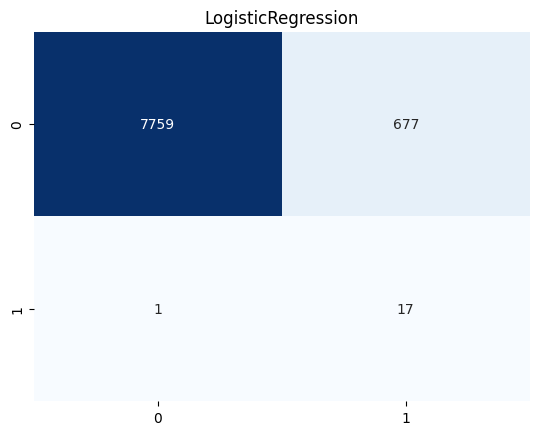

In [81]:
sns.heatmap(confusion_matrix(y_test, y_predlr), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('LogisticRegression')

In [83]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_over,y_over)
y_pred_dt = dt.predict(x_test)
y_predtraindt=dt.predict(x_train)

print(f"Training Accuracy :", accuracy_score(y_train,y_predtraindt))
accuracy_dt = accuracy_score(y_test,y_pred_dt)*100

print(f"Accuracy Score:", accuracy_dt)
print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_dt)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,y_pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,y_pred_dt)}")


#Precision and recall
print(f"Precision : \n {precision_score(y_test,y_pred_dt)}\n")
print(f"Recall : \n {recall_score(y_test,y_pred_dt)}")
#cross validation score
# scores = cross_val_score(dt, y_over, y_over,cv=5,scoring = "accuracy" ).mean()*100
# print(f"\nCross validation score :", scores)

# #result of accuracy minus cv score
# result = accuracy_dt - scores
# print(f"\n\nAccuracy Score - Cross Validation Score :", result)

Training Accuracy : 1.0
Accuracy Score: 99.65696711615803
roc_auc_score: 80.42516200410937
---------------------------------------------------
Confusion Matrix : 
 [[8414   22]
 [   7   11]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8436
         1.0       0.33      0.61      0.43        18

    accuracy                           1.00      8454
   macro avg       0.67      0.80      0.71      8454
weighted avg       1.00      1.00      1.00      8454

Precision : 
 0.3333333333333333

Recall : 
 0.6111111111111112


Text(0.5, 1.0, 'DecisionTreeClassifier')

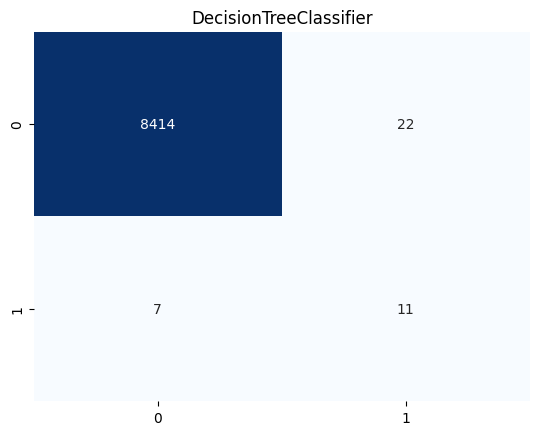

In [84]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('DecisionTreeClassifier')

In [85]:
## Gaussian nb
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_over,y_over)
y_pred_bbg = nb.predict(x_test)
y_predtrainnb=nb.predict(x_train)

print(f"Training Accuracy :", accuracy_score(y_train,y_predtrainnb))
accuracy_bbg = accuracy_score(y_test,y_pred_bbg)*100

print(f"Accuracy Score:", accuracy_bbg)
print(f"\nroc_auc_score: {roc_auc_score(y_test,y_pred_bbg)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,y_pred_bbg)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,y_pred_bbg)}")

#Precision and Recall
print(f"Precision : \n {precision_score(y_test,y_pred_bbg)}\n")
print(f"Recall : \n {recall_score(y_test,y_pred_bbg)}")

#cross validation score
scores = cross_val_score(nb, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_bbg - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Training Accuracy : 0.734800094629761
Accuracy Score: 73.87035722734801

roc_auc_score: 81.3636004425478
---------------------------------------------------
Confusion Matrix : 
 [[6229 2207]
 [   2   16]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       1.00      0.74      0.85      8436
         1.0       0.01      0.89      0.01        18

    accuracy                           0.74      8454
   macro avg       0.50      0.81      0.43      8454
weighted avg       1.00      0.74      0.85      8454

Precision : 
 0.007197480881691408

Recall : 
 0.8888888888888888

Cross validation score : 86.71161825726142


Accuracy Score - Cross Validation Score : -12.841261029913412


Text(0.5, 1.0, 'GaussianNB')

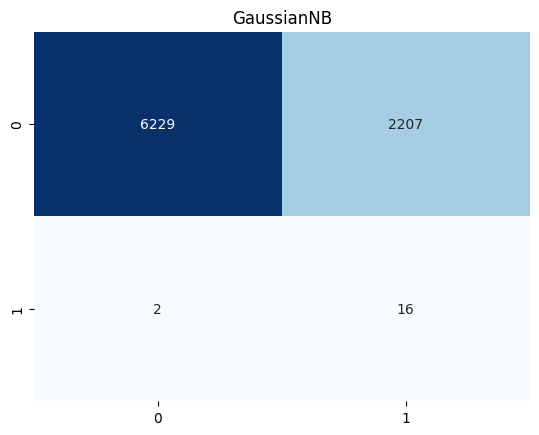

In [86]:
sns.heatmap(confusion_matrix(y_test,y_pred_bbg), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('GaussianNB')

In [87]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
RF = RandomForestClassifier()
RF.fit(x_over,y_over)
y_pred_rf = RF.predict(x_test)
y_predtrainrf=RF.predict(x_train)

print(f"Training Accuracy :", accuracy_score(y_train,y_predtrainrf))
accuracy_RF = accuracy_score(y_test,y_pred_rf)*100

print(f"Accuracy Score:", accuracy_RF)
print(f"\nroc_auc_score: {roc_auc_score(y_test,y_pred_rf)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,y_pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,y_pred_rf)}")

#Precision and Recall
print(f"Precision : \n {precision_score(y_test,y_pred_rf)}\n")
print(f"Recall : \n {recall_score(y_test,y_pred_rf)}")

#cross validation score
scores = cross_val_score(RF, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_RF - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Training Accuracy : 1.0
Accuracy Score: 99.88171279867518

roc_auc_score: 88.85332701122174
---------------------------------------------------
Confusion Matrix : 
 [[8430    6]
 [   4   14]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8436
         1.0       0.70      0.78      0.74        18

    accuracy                           1.00      8454
   macro avg       0.85      0.89      0.87      8454
weighted avg       1.00      1.00      1.00      8454

Precision : 
 0.7

Recall : 
 0.7777777777777778

Cross validation score : 99.92442205097805


Accuracy Score - Cross Validation Score : -0.04270925230287048


Text(0.5, 1.0, 'RandomForestClassifier')

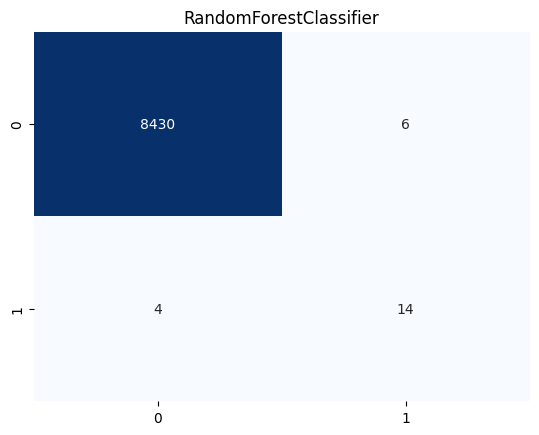

In [88]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('RandomForestClassifier')

In [89]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_over,y_over)
y_pred_kn = kn.predict(x_test)
y_predtrainkn=kn.predict(x_train)

print(f"Training Accuracy :", accuracy_score(y_train,y_predtrainkn))
accuracy_kn = accuracy_score(y_test,y_pred_kn)*100

print(f"Accuracy Score:", accuracy_kn)
print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_kn)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,y_pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,y_pred_kn)}")


#Precision and Recall
print(f"Precision : \n {precision_score(y_test,y_pred_kn)}\n")
print(f"Recall : \n {recall_score(y_test,y_pred_kn)}")

#cross validation score
scores = cross_val_score(kn, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_kn - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Training Accuracy : 0.984356517624793
Accuracy Score: 97.64608469363615
roc_auc_score: 79.41757547020705
---------------------------------------------------
Confusion Matrix : 
 [[8244  192]
 [   7   11]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      8436
         1.0       0.05      0.61      0.10        18

    accuracy                           0.98      8454
   macro avg       0.53      0.79      0.54      8454
weighted avg       1.00      0.98      0.99      8454

Precision : 
 0.054187192118226604

Recall : 
 0.6111111111111112

Cross validation score : 98.78778897451097


Accuracy Score - Cross Validation Score : -1.1417042808748192


Text(0.5, 1.0, 'KNeighborsClassifier')

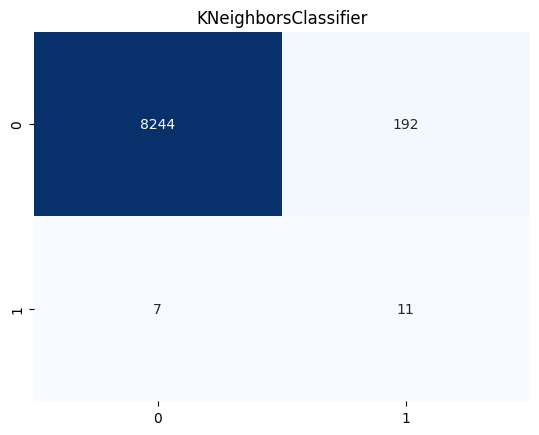

In [90]:
sns.heatmap(confusion_matrix(y_test,y_pred_kn), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('KNeighborsClassifier')

In [91]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
ada=AdaBoostClassifier()
ada_model=ada.fit(x_over,y_over)
y_pred_ad=ada_model.predict(x_test)

y_predtrainada=ada_model.predict(x_train)

print(f"Training Accuracy :", accuracy_score(y_train,y_predtrainada))
accuracy_ad = accuracy_score(y_test,y_pred_ad)*100

print(f"Accuracy Score:", accuracy_ad)
print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_ad)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,y_pred_ad)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,y_pred_ad)}")


#Precision and Recall
print(f"Precision : \n {precision_score(y_test,y_pred_ad)}\n")
print(f"Recall : \n {recall_score(y_test,y_pred_ad)}")

#cross validation score
scores = cross_val_score(ada, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_ad - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Training Accuracy : 0.9841790868228057
Accuracy Score: 98.28483558079016
roc_auc_score: 90.82503556187767
---------------------------------------------------
Confusion Matrix : 
 [[8294  142]
 [   3   15]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      8436
         1.0       0.10      0.83      0.17        18

    accuracy                           0.98      8454
   macro avg       0.55      0.91      0.58      8454
weighted avg       1.00      0.98      0.99      8454

Precision : 
 0.09554140127388536

Recall : 
 0.8333333333333334

Cross validation score : 98.72554831061055


Accuracy Score - Cross Validation Score : -0.44071272982039034


Text(0.5, 1.0, 'AdaBoostClassifier')

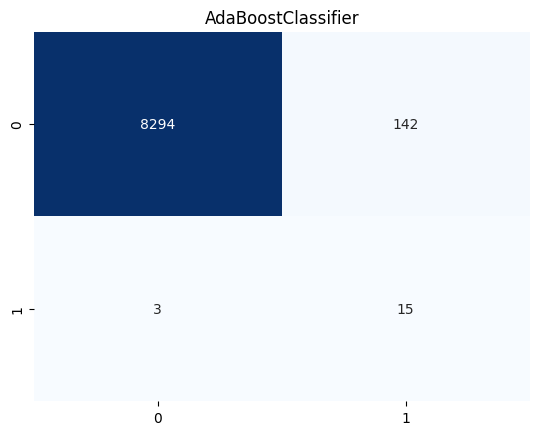

In [92]:
sns.heatmap(confusion_matrix(y_test,y_pred_ad), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('AdaBoostClassifier')

In [93]:
#Gradient boost on Balanced Data set
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
gb=GradientBoostingClassifier()
gb_model=gb.fit(x_over,y_over)
y_pred_gb=gb_model.predict(x_test)
y_predtraingb=gb_model.predict(x_train)

print(f"Training Accuracy :", accuracy_score(y_train,y_predtraingb))
accuracy_gb = accuracy_score(y_test,y_pred_gb)*100

print(f"Accuracy Score:", accuracy_gb)
print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_gb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,y_pred_gb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,y_pred_gb)}")


#Precision and Recall
print(f"Precision : \n {precision_score(y_test,y_pred_gb)}\n")
print(f"Recall : \n {recall_score(y_test,y_pred_gb)}")

#cross validation score
scores = cross_val_score(gb, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_gb - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Training Accuracy : 0.9916607523066004
Accuracy Score: 98.98273006860657
roc_auc_score: 96.71842895527107
---------------------------------------------------
Confusion Matrix : 
 [[8351   85]
 [   1   17]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      8436
         1.0       0.17      0.94      0.28        18

    accuracy                           0.99      8454
   macro avg       0.58      0.97      0.64      8454
weighted avg       1.00      0.99      0.99      8454

Precision : 
 0.16666666666666666

Recall : 
 0.9444444444444444

Cross validation score : 99.26200355660937


Accuracy Score - Cross Validation Score : -0.2792734880028007


Text(0.5, 1.0, 'GradientBoostingClassifier')

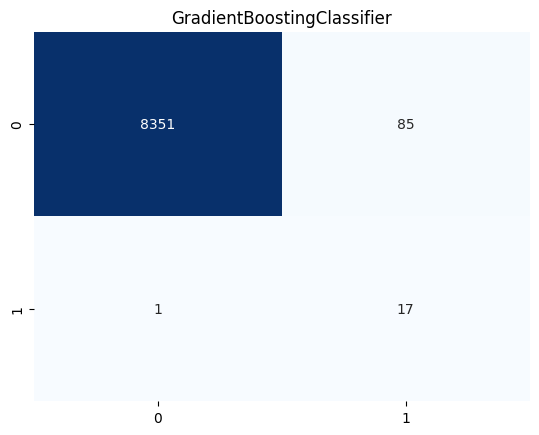

In [94]:
sns.heatmap(confusion_matrix(y_test,y_pred_gb), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('GradientBoostingClassifier')

In [95]:
# we are using bagging with naive bayes
bgnb=BaggingClassifier()
bgnb_model=bgnb.fit(x_over,y_over)
y_pred_nv=bgnb_model.predict(x_test)
y_predtrainbgnb=bgnb_model.predict(x_train)

print(f"Training Accuracy :", accuracy_score(y_train,y_predtrainbgnb))

accuracy_nb = accuracy_score(y_test,y_pred_nv)*100

print(f"Accuracy Score:", accuracy_nb)
print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_nv)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,y_pred_nv)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,y_pred_nv)}")


#Precision and Recall
print(f"Precision : \n {precision_score(y_test,y_pred_nv)}\n")
print(f"Recall : \n {recall_score(y_test,y_pred_nv)}")

#cross validation score
scores = cross_val_score(bgnb, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_nb - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Training Accuracy : 0.9998225691980128
Accuracy Score: 99.71611071682044
roc_auc_score: 74.91109530583215
---------------------------------------------------
Confusion Matrix : 
 [[8421   15]
 [   9    9]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8436
         1.0       0.38      0.50      0.43        18

    accuracy                           1.00      8454
   macro avg       0.69      0.75      0.71      8454
weighted avg       1.00      1.00      1.00      8454

Precision : 
 0.375

Recall : 
 0.5

Cross validation score : 99.83847065797275


Accuracy Score - Cross Validation Score : -0.12235994115231108


Text(0.5, 1.0, 'BaggingClassifier')

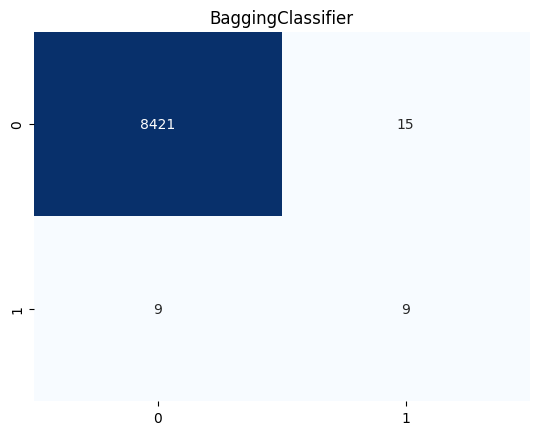

In [96]:
sns.heatmap(confusion_matrix(y_test,y_pred_nv), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('BaggingClassifier')

In [97]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)
y_predtrainxgb=xgb.predict(x_train)

print(f"Training Accuracy :", accuracy_score(y_train,y_predtrainxgb))
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)*100

print(f"Accuracy Score:", accuracy_xgb)
print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_xgb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,y_pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,y_pred_xgb)}")

#Precision and Recall
print(f"Precision : \n {precision_score(y_test,y_pred_xgb)}\n")
print(f"Recall : \n {recall_score(y_test,y_pred_xgb)}")


#cross validation score
scores = cross_val_score(xgb, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_xgb - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Training Accuracy : 1.0
Accuracy Score: 99.94085639933759
roc_auc_score: 86.11111111111111
---------------------------------------------------
Confusion Matrix : 
 [[8436    0]
 [   5   13]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8436
         1.0       1.00      0.72      0.84        18

    accuracy                           1.00      8454
   macro avg       1.00      0.86      0.92      8454
weighted avg       1.00      1.00      1.00      8454

Precision : 
 1.0

Recall : 
 0.7222222222222222

Cross validation score : 99.91997628927089

Accuracy Score - Cross Validation Score : 0.020880110066698876


Text(0.5, 1.0, 'XGBClassifier')

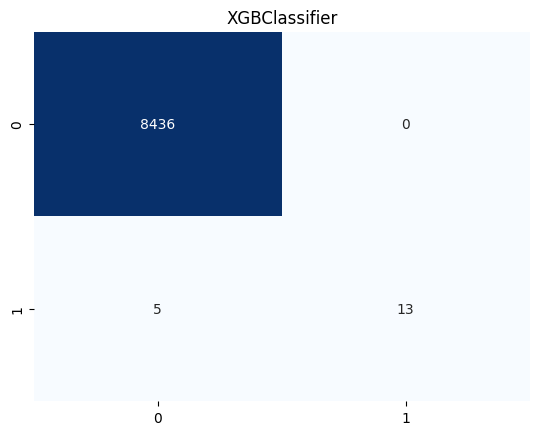

In [98]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBClassifier')

<Figure size 2000x600 with 0 Axes>

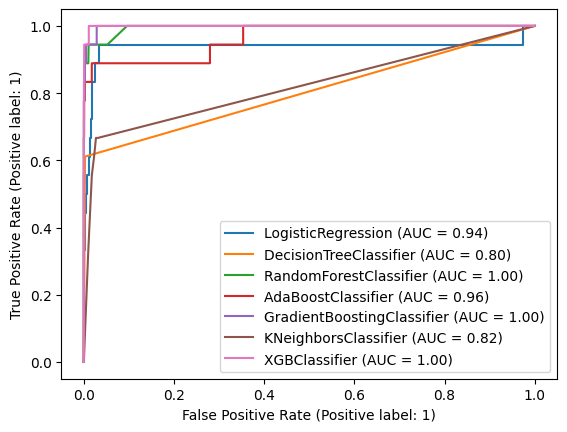

<Figure size 2500x2500 with 0 Axes>

In [99]:
#Lets plot roc curve and check auc and performance of all algorithms
plt.figure(figsize=(20,6))
from sklearn.metrics import RocCurveDisplay
disp = RocCurveDisplay.from_estimator(LR, x_test, y_test)
RocCurveDisplay.from_estimator(dt, x_test, y_test,ax = disp.ax_ )
RocCurveDisplay.from_estimator(RF, x_test, y_test,ax = disp.ax_)
RocCurveDisplay.from_estimator(ada, x_test, y_test,ax = disp.ax_)
RocCurveDisplay.from_estimator(gb, x_test, y_test,ax = disp.ax_)
RocCurveDisplay.from_estimator(kn, x_test, y_test,ax = disp.ax_)
RocCurveDisplay.from_estimator(xgb, x_test, y_test,ax = disp.ax_)

plt.figure(figsize = (25,25))
plt.show()

In [100]:
list1=['Logistic Regression','Decision Tree','Random Forest','Bagging','Adaboost','GradientBoosting','XGBoost','Naive-Bayes'
       ,'K-nearestNeighbor']

list2=[accuracy_lr,accuracy_dt,accuracy_RF,accuracy_bbg, accuracy_ad, accuracy_gb , accuracy_xgb , accuracy_nb ,
       accuracy_kn]

final_accuracy=pd.DataFrame({'Algorithm':list1,'Accuracy':list2})

final_accuracy

,Algorithm,Accuracy
0,Logistic Regression,91.980128
1,Decision Tree,99.656967
2,Random Forest,99.881713
3,Bagging,73.870357
4,Adaboost,98.284836
5,GradientBoosting,98.982730
6,XGBoost,99.940856
7,Naive-Bayes,99.716111
8,K-nearestNeighbor,97.646085


<Axes: xlabel='Algorithm', ylabel='Accuracy'>

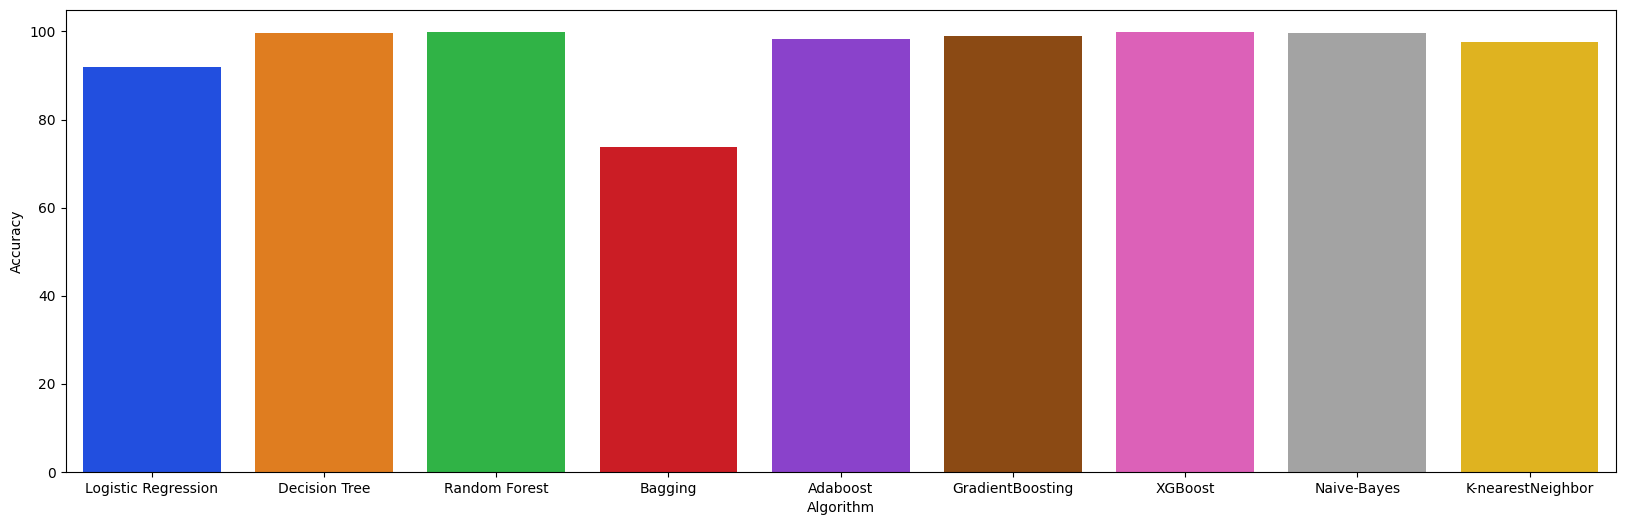

In [101]:
plt.figure(figsize=(20,6))
sns.barplot(x=final_accuracy['Algorithm'],y=final_accuracy['Accuracy'],palette='bright')

In [102]:
## Hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV

In [103]:
#lets selects different parameters for tuning
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [10,12,15,20,22],
                'n_estimators':[100,200,300,400],
                'max_features':['aoto','sqrt','log2'],
                'min_samples_split': [2]
                }

In [104]:
cv_rf = RandomizedSearchCV(RF, cv = 10,
                     param_distributions=grid_params,
                     n_jobs = 3)

cv_rf.fit(x_over, y_over)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'n_estimators': 300, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 22, 'criterion': 'entropy'}


In [105]:
RF.set_params(n_estimators=400,
                  bootstrap = True,
                max_features='sqrt',
                  criterion= 'gini',
                 min_samples_split= 2,
                 max_depth= 22)

RandomForestClassifier(max_depth=22, n_estimators=400)

In [107]:
RF.fit(x_over,y_over)

RandomForestClassifier(max_depth=22, n_estimators=400)

In [108]:
y_pred_Hyper=RF.predict(x_test)

In [ ]:
accuracy_RF_hyper = accuracy_score(y_test,y_pred_Hyper)*100

print(f"Accuracy Score:", accuracy_RF)
print(f"\nroc_auc_score: {roc_auc_score(y_test,y_pred_Hyper)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,y_pred_Hyper)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,y_pred_Hyper)}")

#Precision and Recall
print(f"Precision : \n {precision_score(y_test,y_pred_Hyper)}\n")
print(f"Recall : \n {recall_score(y_test,y_pred_Hyper)}")

#cross validation score
scores = cross_val_score(RF, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy_RF_hyper - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 99.88171279867518

roc_auc_score: 86.08147621305517
---------------------------------------------------
Confusion Matrix : 
 [[8431    5]
 [   5   13]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8436
         1.0       0.72      0.72      0.72        18

    accuracy                           1.00      8454
   macro avg       0.86      0.86      0.86      8454
weighted avg       1.00      1.00      1.00      8454

Precision : 
 0.7222222222222222

Recall : 
 0.7222222222222222


In [ ]:
#IMBALANCED DATA

## DecisionTreeClassifier

In [ ]:
#(criterion='gini')?
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini') #(criterion='gini')
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt=dtree.predict(x_test)
print(y_pred_dt)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_traindt=dtree.predict(x_train)
print('Training Accuracy :', accuracy_score(y_train,y_pred_traindt))

Training Accuracy : 0.9999990177002556


In [ ]:
y_pred_testdt = dtree.predict(x_test)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred_testdt))

Testing Accuracy:  0.9996479437715909


In [ ]:
confusion_matrix(y_test,y_pred_dt)

array([[1270678,     219],
       [    229,    1398]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270897
           1       0.86      0.86      0.86      1627

    accuracy                           1.00   1272524
   macro avg       0.93      0.93      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



Text(0.5, 1.0, 'DecisionTreeClassifier')

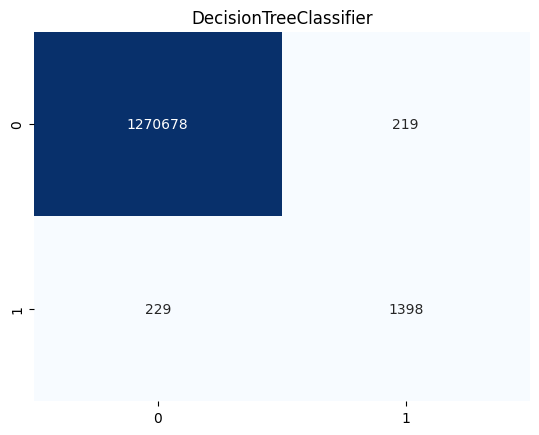

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('DecisionTreeClassifier')

## ROC and AUC

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
log_roc_auc_score=roc_auc_score(y_test,y_pred_dt)
print('Area under the curve is ',log_roc_auc_score)

Area under the curve is  0.9295389172105483


In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_pred_dt)
print(fpr,tpr,threshold)

[0.00000000e+00 1.72319236e-04 1.00000000e+00] [0.         0.85925015 1.        ] [inf  1.  0.]


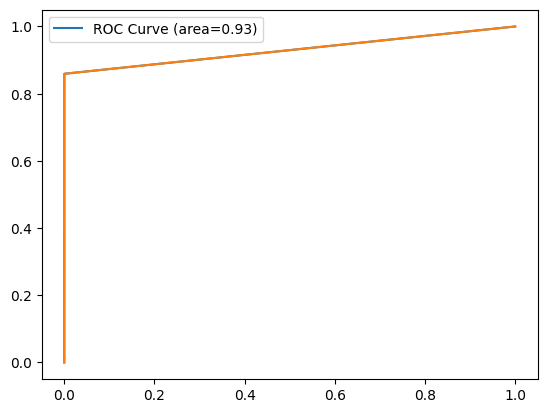

In [ ]:
plt.figure()
plt.plot(fpr,tpr,label="ROC Curve (area=%0.2f)" %log_roc_auc_score)
plt.plot(fpr,tpr)
plt.legend()
plt.show()

In [ ]:
df_importance=pd.DataFrame()
df_importance['Column_name']=x.columns
df_importance['Importance']=dtree.feature_importances_
df_importance

,Column_name,Importance
0,amount,0.221476
1,oldbalanceOrg,0.537099
2,newbalanceOrig,0.066370
3,oldbalanceDest,0.039321
4,newbalanceDest,0.135734


## BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier()
bag.fit(x_train,y_train)
y_pred_bag=bag.predict(x_test)

In [ ]:
y_pred_trainbag=bag.predict(x_train)
print('Training Accuracy :', accuracy_score(y_train,y_pred_trainbag))

Training Accuracy : 0.9999738708267978


In [ ]:
y_pred_testbag = bag.predict(x_test)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred_testbag))

Testing Accuracy:  0.9997013808776888


##  KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred_kn=kn.predict(x_test)

In [ ]:
y_pred_trainbag=bag.predict(x_train)
print('Training Accuracy :', accuracy_score(y_train,y_pred_trainbag))

Training Accuracy : 0.9999738708267978


In [ ]:
y_pred_testbag = bag.predict(x_test)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred_testbag))

Testing Accuracy:  0.9997013808776888


In [ ]:
#Hyperparameter Tuning.. (Grid Search CV method)
param={'criterion':['gini','entropy','log_loss'],\
        'max_depth':[5,6,7,9,10],\
        'min_samples_split':[3,4,5,6,7],\
        'min_samples_leaf':[2,3,4,5],
        'max_features':['sqrt','log2','auto']}

In [ ]:
#cv ,cv=5?
from sklearn.model_selection import GridSearchCV
KNeighborsClassifier
cv=GridSearchCV(rf,param,cv=5,scoring='accuracy')
cv.fit(x_train,y_train)

In [ ]:
cv.best_params_

In [ ]:
y_pred_cv=cv.predict(x_test)
accuracy_score(y_test,y_pred_cv)

##  RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf=rf.predict(x_test)
print(y_pred_rf)

[0 0 0 ... 0 0 0]


In [ ]:
y_pred_trainrf=rf.predict(x_train)
print('Training Accuracy :', accuracy_score(y_train,y_pred_trainrf))

Training Accuracy : 0.9999988212403067


In [ ]:
y_pred_testrf = rf.predict(x_test)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred_testrf))

Testing Accuracy:  0.9995874341073332


In [ ]:
confusion_matrix(y_test,y_pred_rf)

array([[1270816,      81],
       [    444,    1183]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270897
           1       0.94      0.73      0.82      1627

    accuracy                           1.00   1272524
   macro avg       0.97      0.86      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
print(y_train.value_counts())

isFraud
0    5083510
1       6586
Name: count, dtype: int64


Text(0.5, 1.0, 'RandomForestClassifier')

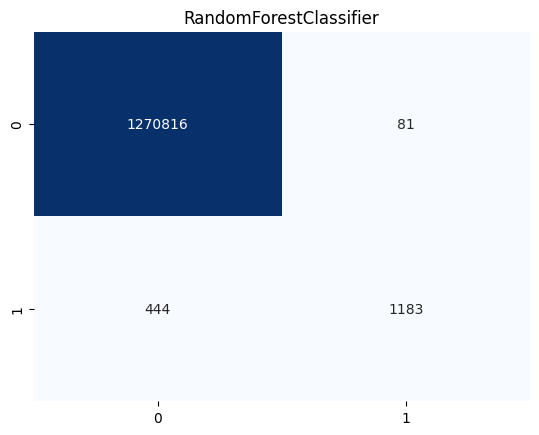

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('RandomForestClassifier')

## XGBClassifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb=rf.predict(x_test)
print(y_pred_xgb)

[0 0 0 ... 0 0 0]


In [ ]:
y_pred_trainxgb=xgb.predict(x_train)
print('Training Accuracy :', accuracy_score(y_train,y_pred_trainxgb))

Training Accuracy : 0.9995762358902465


In [ ]:
y_pred_testxgb = rf.predict(x_test)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred_testxgb))

Testing Accuracy:  0.9995874341073332


In [ ]:
confusion_matrix(y_test,y_pred_xgb)

array([[1270816,      81],
       [    444,    1183]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270897
           1       0.94      0.73      0.82      1627

    accuracy                           1.00   1272524
   macro avg       0.97      0.86      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



Text(0.5, 1.0, 'XGBClassifier')

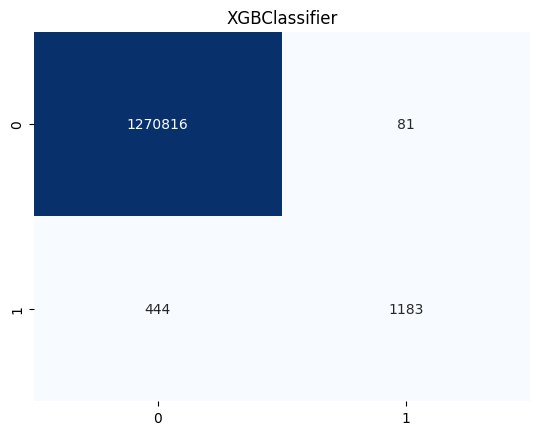

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBClassifier')

## AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
y_pred=Ada.predict(x_test)

In [ ]:
# Training
accuracy_score(y_train,Ada.predict(x_train))

0.9991279142868819

In [ ]:
# Testing
accuracy_score(y_test,Ada.predict(x_test))

0.9991332187055019

## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Grad=GradientBoostingClassifier()
Grad.fit(x_train,y_train)
y_pred=Grad.predict(x_test)

KeyboardInterrupt: 

In [ ]:
# Training
accuracy_score(y_train,Grad.predict(x_train))

In [ ]:
# Testing
accuracy_score(y_test,Grad.predict(x_test))

## LinearRegression


In [ ]:
# it is uesed to get best fit line for datapoints
#The distance between datapoints and line tells whether a model has captured a strong relationship or not.
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
lir=LinearRegression()
lir.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_trainlir=lir.predict(x_train)
y_pred_trainlir
# print('Training Accuracy :', accuracy_score(y_train,y_pred_trainlr))
r2_score(y_train,y_pred_trainlir)

0.15654491334876697

In [ ]:
y_pred_testlir=lir.predict(x_test)
y_pred_testlir
# print('Training Accuracy :', accuracy_score(y_test,y_pred_testlir))
r2_score(y_test,y_pred_testlir)

0.14946608931765537

In [ ]:
#OLS MODEL? best fit line
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as srm

In [ ]:
ols_model=srm.OLS(endog=y_train,exog=x_train).fit()

In [ ]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                isFraud   R-squared (uncentered):                   0.156
Model:                            OLS   Adj. R-squared (uncentered):              0.156
Method:                 Least Squares   F-statistic:                          1.887e+05
Date:                Sun, 14 Jul 2024   Prob (F-statistic):                        0.00
Time:                        18:30:49   Log-Likelihood:                      1.0135e+07
No. Observations:             5090096   AIC:                                 -2.027e+07
Df Residuals:                 5090091   BIC:                                 -2.027e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0084   2.83e-05    294.806      0.000       0.008       0.008
x2             0.2824      0.000    931.922      0.000       0.282       0.283
x3            -0.2831      0.000   -932.901      0.000      -0.284      -0.282
x4             0.0342      0.000    286.813      0.000       0.034       0.034
x5            -0.0373      0.000   -291.032      0.000      -0.038      -0.037
==============================================================================
Omnibus:                 12394982.878   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     117052203614.011
Skew:                          26.089   Prob(JB):                         0.00
Kurtosis:                     744.069   Cond. No.                         44.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

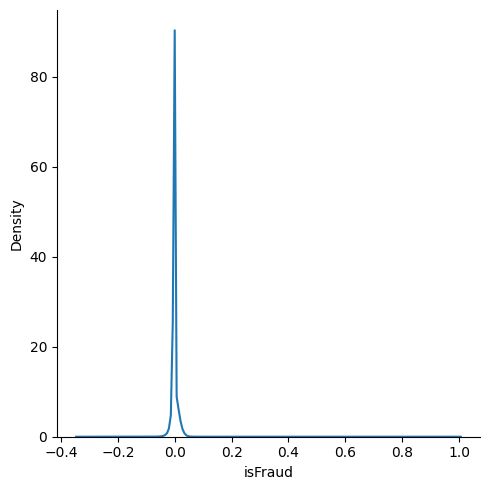

In [ ]:
sns.displot(y_test-y_pred_testlir,kind='kde')

In [ ]:
#what it is?
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [ ]:
#ridge:
ri=Ridge(alpha=0.1)
ri.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
lst=[0.1,0.2,0.3,0.4,0.5]
accuracy=[]
for i in lst:
    ri=Lasso(alpha=i)
    ri.fit(x_train,y_train)
    y_pred_ri=ri.predict(x_test)
    accuracy.append(r2_score(y_test,y_pred_ri))
print(accuracy)


[-1.8389559275355793e-07, -1.8389559275355793e-07, -1.8389559275355793e-07, -1.8389559275355793e-07, -1.8389559275355793e-07]


In [ ]:
y_pred_ri=ri.predict(x_test)
r2_score(y_test,y_pred_ri)

-1.8389559275355793e-07

In [ ]:
#lasso
la=Lasso(alpha=0.1)
la.fit(x_train,y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred_la=la.predict(x_test)
r2_score(y_test,y_pred_la)

-1.8389559275355793e-07

In [ ]:
from sklearn import metrics
print('mse',metrics.mean_squared_error(y_test,y_pred_testlir))
print('rmse',np.sqrt(metrics.mean_squared_error(y_test,y_pred_testlir)))
print('mae',metrics.mean_absolute_error(y_test,y_pred_testlir))
print('mse',metrics.mean_absolute_percentage_error(y_test,y_pred_testlir))

mse 0.001086069398780311
rmse 0.032955567037760265
mae 0.006429664118729538
mse 24054826787507.684


In [ ]:
x_test.shape

(1272524, 5)

ValueError: x and y must be the same size

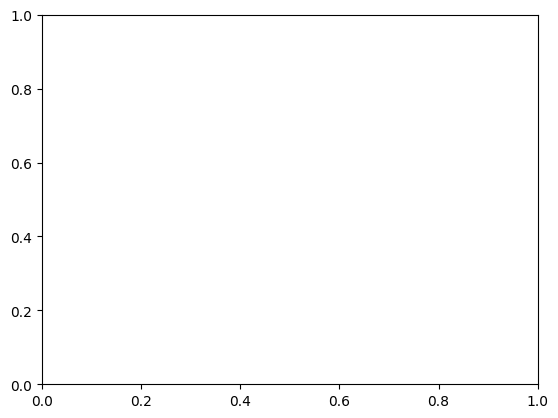

In [ ]:
# why?
# plt.scatter(x_test,y_test,color="green")
# plt.plot(x_train,y_pred_trainlir="red")
# plt.show()

## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dtr=dtr.predict(x_test)
print(y_pred_dtr)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
y_pred_traindtr=Dtree.predict(x_train)
# print('Training Accuracy :', accuracy_score(y_train,y_pred_traindtr))
r2_score(y_train,y_pred_traindtr)

0.9993918642201449

In [ ]:
r2_score(y_test,y_pred_dtr)

0.7312113464363641

In [ ]:
#max_deoth?
dtr=DecisionTreeRegressor(max_depth=16)
dtr.fit(x_train,y_train)
from sklearn.metrics import r2_score
y_pred_dtr=dtr.predict(x_test)
r2_score(y_test,y_pred_dtr)

0.708345701044101

## RandomForestRegressor

In [ ]:
# n estimators ?
from sklearn.ensemble import RandomForestRegressor
Rforest=RandomForestRegressor(n_estimators=200)
Rforest.fit(x_train,y_train)

KeyboardInterrupt: 

## PolynomialRegression

In [ ]:
# degree?
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

In [ ]:
linear_ploy=LinearRegression()
lr.fit(x_train_poly,y_train)
y_pred_poly=lr.predict(x_test_poly)

In [ ]:
r2_score(y_test,y_pred_poly)

0.20219505127330883

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lr=lr.predict(x_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
y_pred_trainlr=rf.predict(x_train)
print('Training Accuracy :', accuracy_score(y_train,y_pred_trainlr))

Training Accuracy : 0.9999988212403067


In [ ]:
y_pred_testrf = dtree.predict(x_test)
print('Testing Accuracy: ',accuracy_score(y_test,y_pred_testlr))

Testing Accuracy:  0.999655016329751


In [ ]:
confusion_matrix(y_test,y_pred_lr)

array([[1270860,      37],
       [   1038,     589]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270897
           1       0.94      0.36      0.52      1627

    accuracy                           1.00   1272524
   macro avg       0.97      0.68      0.76   1272524
weighted avg       1.00      1.00      1.00   1272524



Text(0.5, 1.0, 'LogisticRegression')

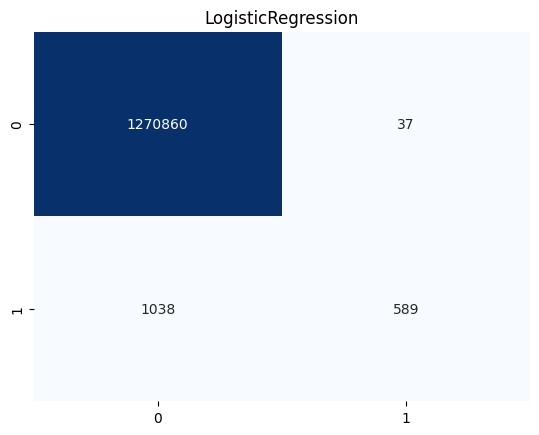

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('LogisticRegression')

In [ ]:
plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('LogisticRegression')
plt.subplot(2,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('DecisionTreeClassifier')
plt.subplot(2,2,3)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('RandomForestClassifier')
plt.subplot(2,2,4)
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, annot_kws={"fontsize":10}, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBClassifier')
plt.subplots_adjust(hspace=0.5)